In [10]:
from dowhy import CausalModel
import pandas as pd
import networkx as nx

In [11]:
data = pd.read_csv("a1_data.csv")
data.head()

,A,B,C,D,E,F,G,H,I,J,K
0,3.179665,3.030625,3.222752,2.836624,3.386284,1.910165,2.179628,3.464657,3.705143,3.921797,3.566766
1,3.313155,3.127535,3.367189,2.799483,2.527001,2.359419,2.461049,3.394200,3.002324,3.487035,3.753581
2,3.531847,3.554489,3.441636,2.582776,2.730851,2.263097,2.461049,3.452962,3.531599,3.773342,3.254741
3,3.621384,3.828081,3.640896,2.704508,1.727649,1.855651,2.021082,3.570291,3.611415,3.725917,3.328318
4,3.285691,3.206716,2.992451,2.562289,3.011359,2.414187,2.612864,3.331957,3.143080,3.679484,3.874796


In [12]:
# Create a causal model from the data and given graph.
g1 = nx.DiGraph()
graph_cons = [("A", "C"), ("A", "E"), ("A", "I"), ("A", "K"), ("B", "C"), ("B", "F"),("B", "H"), ("B", "J"), ("C", "D"), ("C", "F"), ("C", "J"), ("D", "J"),("E", "F"), ("G", "F"), ("G", "J"), ("H", "E"), ("H", "G"), ("H", "J"),("I", "E"), ("I", "K"), ("K", "E"), ("K", "J")]
g1.add_edges_from(graph_cons)

# Create a fully connected undirected graph
g2 = nx.Graph()
for x in list("ABCDEFGHIJK"):
    for y in list("ABCDEFGHIJK"):
        if x != y:
            g2.add_edge(x, y)

graph = "\n".join(nx.generate_gml(g1))

### Manual constraint checking for the graph

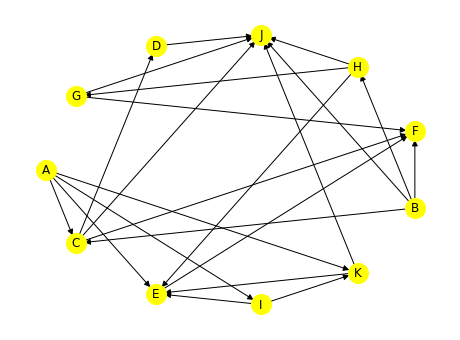

In [13]:
model = CausalModel(
    data=data,
    treatment="A",
    outcome="B",
    graph=graph)
model.view_model()


In [14]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

No directed path from ['A'] to ['B'] in the causal graph.
Causal effect is zero.


### Automated constraint checking for the graph for all possible combinations of treatments and outcomes

In [15]:
VERBOSE_LEVEL = 2  # 0: no output, 1: only connection, 2: all

# Iterate over all possible combinations of treatments and outcomes.
for x, y in graph_cons:
    # Create a causal model from the data and given graph.
    model = CausalModel(data=data, treatment=x, outcome=y, graph=graph)
    identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
    print(x, y)
    print("=====================================")

    # Check if there is a connection between the treatment and the outcome.
    if VERBOSE_LEVEL == 1:
        if  len(identified_estimand.get_backdoor_variables()) == 0 and \
            len(identified_estimand.get_frontdoor_variables()) == 0 and \
            len(identified_estimand.get_instrumental_variables()) == 0 and \
            len(identified_estimand.get_mediator_variables()) == 0:
            
            print("No connection!")
        else:
            print("Estimand found!")
    
    # Print the identified estimand.
    if VERBOSE_LEVEL == 2:
        print(identified_estimand)

A C
No connection!
A E
No connection!
A I
No connection!
A K
No connection!
B C
No connection!
B F
No connection!
B H
No connection!
B J
No connection!
C D
Estimand found!
C F
Estimand found!
C J
Estimand found!
D J
Estimand found!
E F
Estimand found!
G F
Estimand found!
G J
Estimand found!
H E
Estimand found!
H G
Estimand found!
H J
Estimand found!
I E
Estimand found!
I K
Estimand found!
K E
Estimand found!
K J
Estimand found!
